In [162]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data

In [163]:
df = pd.DataFrame('zipped_data')

ValueError: DataFrame constructor not properly called!

In [164]:
# Load the data from the csv file
def load_data(file_path):
    data = []
    
    with open(file_path) as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            data.append(row)
    return data

data = load_data('Data/insurance.csv')


In [165]:
print(type(data))

<class 'list'>


In [166]:
print(data[:3])

[{'age': '19', 'sex': 'female', 'bmi': '27.9', 'children': '0', 'smoker': 'yes', 'region': 'southwest', 'charges': '16884.924'}, {'age': '18', 'sex': 'male', 'bmi': '33.77', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '1725.5523'}, {'age': '28', 'sex': 'male', 'bmi': '33', 'children': '3', 'smoker': 'no', 'region': 'southeast', 'charges': '4449.462'}]


# creating the list of every column

In [167]:
age = []
sex = []
bmi = []
children = []
smoker = []
region = []
charges = []

In [168]:
def extract_data(age):
    for row in data:
        age.append(row['age'])

extract_data(age)

In [169]:
print(age[:3])

['19', '18', '28']


In [170]:
def extract_data(sex):
    for row in data:
        sex.append(row['sex'])

extract_data(sex)

In [171]:
print(sex[:3])

['female', 'male', 'male']


In [172]:
def extract_data(bmi):
    for row in data:
        bmi.append(row['bmi'])

extract_data(bmi)

In [173]:
print(bmi[:3])

['27.9', '33.77', '33']


In [174]:
def extract_data(children):
    for row in data:
        children.append(row['children'])
       
       
extract_data(children) 

In [175]:
print(children[:3])

['0', '1', '3']


In [176]:
def extract_data(smoker):
    for row in data:
        smoker.append(row['smoker'])

extract_data(smoker)

In [177]:
print(smoker[:3])

['yes', 'no', 'no']


In [178]:
def extract_data(region):
    for row in data:
        region.append(row['region'])
    
extract_data(region)

In [179]:
print(region[:3])

['southwest', 'southeast', 'southeast']


In [180]:
def extract_data(charges):
    for row in data:
        charges.append(row['charges'])

extract_data(charges)

In [181]:
print(charges[:3])

['16884.924', '1725.5523', '4449.462']


# Data zipping

In [182]:
zipped_data = list(zip(age, sex, bmi, children, smoker, region, charges))

In [183]:
print(zipped_data[:3])

[('19', 'female', '27.9', '0', 'yes', 'southwest', '16884.924'), ('18', 'male', '33.77', '1', 'no', 'southeast', '1725.5523'), ('28', 'male', '33', '3', 'no', 'southeast', '4449.462')]


# Step 2: Data Analysis

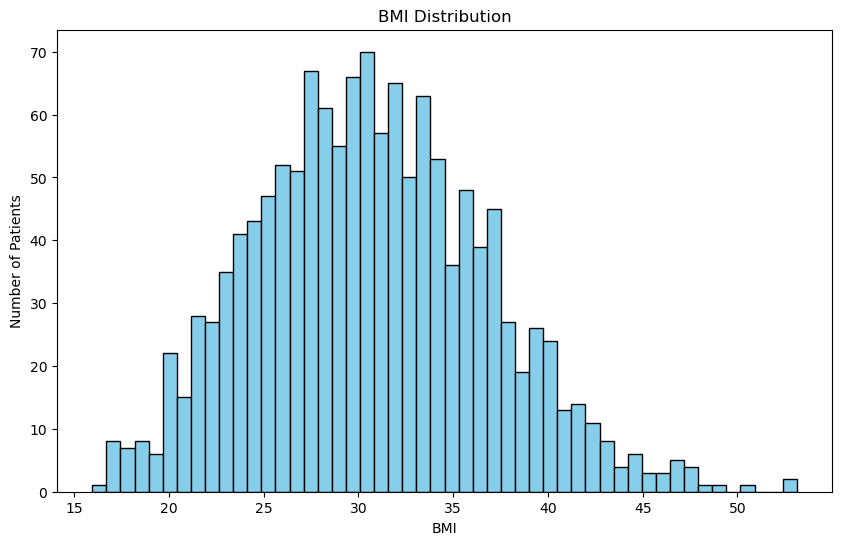

In [184]:
plt.figure(figsize=(10, 6))
plt.hist(df['bmi'], bins=50, color='skyblue', edgecolor='black')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Number of Patients')
plt.show()

### For smokers and non-smokers 

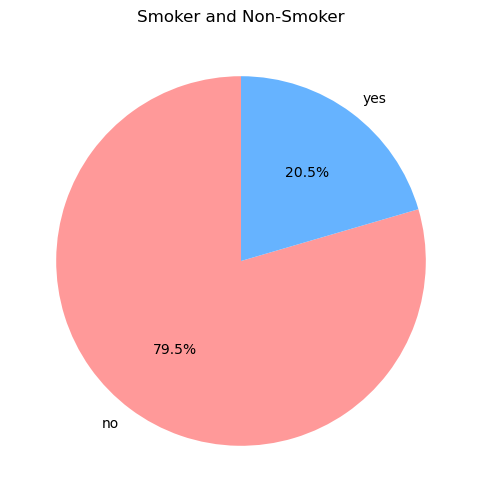

In [185]:
smoker_and_Nonsmoker_count = df['smoker'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(smoker_and_Nonsmoker_count, labels=smoker_and_Nonsmoker_count.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Smoker and Non-Smoker')
plt.show()

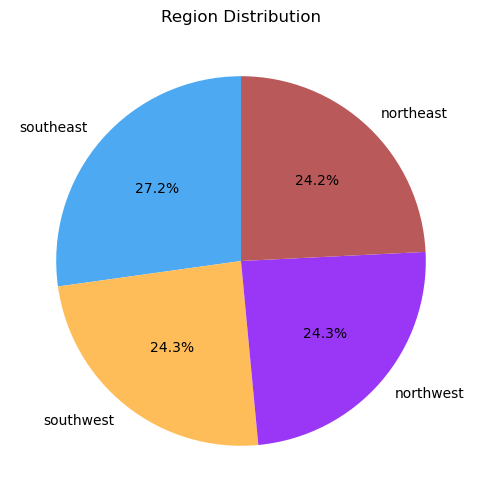

In [186]:
plt.figure(figsize=(10, 6))
plt.pie(df['region'].value_counts(), labels=df['region'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=['#4DAAF2','#FFBD59', '#9A37F6', '#ba595a'])
plt.title('Region Distribution')
plt.show()

# Step 3: Result Analysis

### Average cost of insurance

In [187]:
average_cost = df['charges'].mean()
print(f'Average cost of insurance: {int(average_cost)} US dollars')

Average cost of insurance: 13270 US dollars


In [188]:
max_cost = df['charges'].max()

In [189]:
min_cost = df['charges'].min()
print(f'Maximum cost of insurance: {int(max_cost)} US dollars')
print(f'Minimum cost of insurance: {int(min_cost)} US dollars')

Maximum cost of insurance: 63770 US dollars
Minimum cost of insurance: 1121 US dollars


# Average cost for smokers and Non-smokers

In [190]:
# Average cost of insurance for smokers and non-smokers
average_cost_smoker = df[df['smoker'] == 'yes']['charges'].mean()
average_cost_non_smoker = df[df['smoker'] == 'no']['charges'].mean()
print(f'Average cost of insurance for smokers: {int(average_cost_smoker)} US dollars')

Average cost of insurance for smokers: 32050 US dollars


In [191]:
print(f'Average cost of insurance for non-smokers: {int(average_cost_non_smoker)} US dollars')

Average cost of insurance for non-smokers: 8434 US dollars


In [201]:
# difference of average cost between smokers and non-smokers
difference = average_cost_smoker - average_cost_non_smoker
print(f'Difference of average cost between smokers and non-smokers: {int(difference)} US dollars')

# IF BMI is greater than 30, then the patient is obese


In [192]:
obese_patients = df[df['bmi'] > 30]

In [193]:
obese_patients_count = obese_patients.shape[0]


In [194]:
print(f'The number of obese patients: {obese_patients_count}')

The number of obese patients: 705


# find The most expensive region for insurance

In [195]:
most_expensive_region = df.groupby('region')['charges'].mean().idxmax()
print(f'The most expensive region for insurance: {most_expensive_region}')

The most expensive region for insurance: southeast


In [196]:
most_cheapest_region = df.groupby('region')['charges'].mean().idxmin()
print(f'The most cheapest region for insurance: {most_cheapest_region}')

The most cheapest region for insurance: southwest


# Average cost of insurance for different regions


In [197]:
average_cost_region = df.groupby('region')['charges'].mean()
print(average_cost_region)

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


### Find the patient with the highest insurance cost

In [198]:
highest_cost_patient = zipped_data[df['charges'].idxmax()]
print(highest_cost_patient)

('54', 'female', '47.41', '0', 'yes', 'southeast', '63770.42801')


In [199]:
lowest_cost_patient = zipped_data[df['charges'].idxmin()]

In [200]:
print(lowest_cost_patient)

('18', 'male', '23.21', '0', 'no', 'southeast', '1121.8739')
